In [14]:
# Create the years and durations lists
years = list(range(2011,2021))
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

# Create a dictionary with the two lists
movie_dict = {"years" : years, "durations" : durations}

# Print the dictionary
movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

In [15]:
# Import pandas under its usual alias
import pandas as pd

# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)

# Print the DataFrame
print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


<function matplotlib.pyplot.show(*args, **kw)>

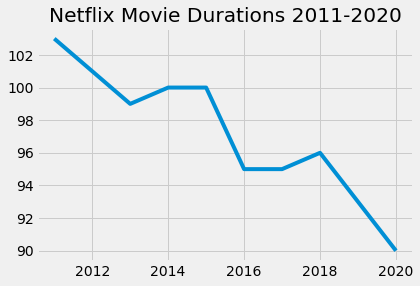

In [16]:
# Import matplotlib.pyplot under its usual alias and create a figure
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of release_years and durations
plt.plot(durations_df['years'], durations_df['durations'])

# Create a title
plt.title("Netflix Movie Durations 2011-2020")

# Show the plot
plt.show

In [17]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df.iloc[0:5, :])

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [18]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df.type == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only.loc[:, ['title', 'country', 'genre', 'release_year', 'duration']]

# Print the first five rows of the new DataFrame
print(netflix_df_movies_only, "\n" , netflix_movies_col_subset[0:5])

     show_id   type                                        title  \
1         s2  Movie                                         7:19   
2         s3  Movie                                        23:59   
3         s4  Movie                                            9   
4         s5  Movie                                           21   
6         s7  Movie                                          122   
7         s8  Movie                                          187   
8         s9  Movie                                          706   
9        s10  Movie                                         1920   
10       s11  Movie                                         1922   
13       s14  Movie                                        2,215   
14       s15  Movie                                         3022   
15       s16  Movie                                       Oct-01   
17       s18  Movie                                       22-Jul   
18       s19  Movie                             

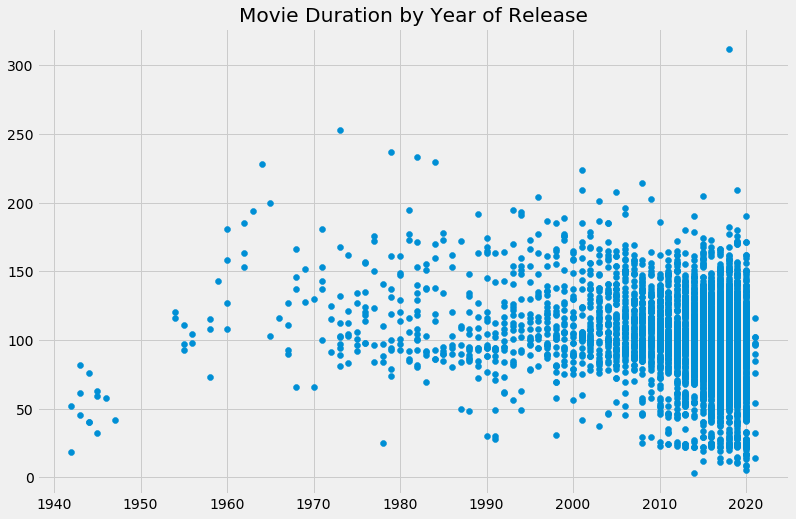

In [19]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

# Create a title
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [20]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration < 60]

# Print the first 20 rows of short_movies
print(short_movies.iloc[0:20])

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [21]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in netflix_movies_col_subset.iterrows() :
    if row.genre == "Children" :
        colors.append("red")
    elif row.genre == "Documentaries" :
        colors.append("blue")
    elif row.genre == "Stand-Up" :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
print(colors[0:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


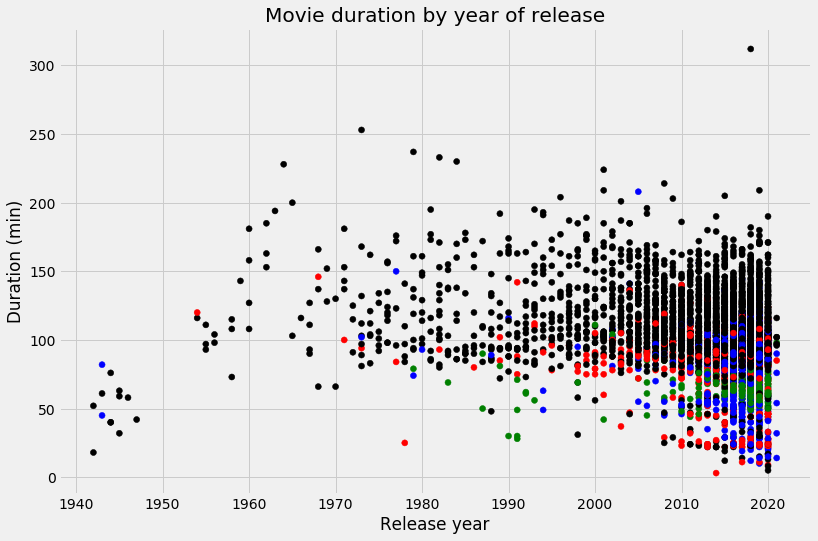

In [22]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], c = colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
fig = plt.xlabel("Release year")
fig = plt.ylabel("Duration (min)")

# Show the plot
fig = plt.show()